# 演習課題

### <font color='green'>・以下のセルに学籍番号と氏名を記入してください。セルはMarkdown形式となっていますので、ダブルクリックで入力してください</font>

学籍番号：　　221115　　　　　　　　　　氏名： 陳　正偉

### <font color='green'>・終了後にファイル名を「学籍番号＋氏名.ipynb」に変更し、提出方法について試験開始時に説明します。</font>

### UCIのデータを使ってワインの品質を予測する分類モデルを作ってみよう

#### Step１　pandas を importしよう

In [17]:
import pandas as pd

#### Step２　UCIのワインデータセットを読み込んでデータフレームに格納しよう
データは'https://drive.google.com/uc?id=1pCh5Rq54SgzD60yXBAWQiLkBf5aDv5Po'に格納されている。  
- データはヘッダーあり、セミコロン区切り（;）のCSV 
- データフレームの名称はwineとせよ  
- read_csvを使う
- read_csvはファイル名の指定だけでなく、URLも受け付ける
- 読込んだデータフレームの先頭5行を表示する

In [18]:
wine = pd.read_csv('https://drive.google.com/uc?id=1pCh5Rq54SgzD60yXBAWQiLkBf5aDv5Po', sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Step３　wine の行数、列数を求めよう

In [19]:
# データフレームの行数と列数を求める
num_rows, num_columns = wine.shape

# 結果を出力
print(f"データフレーム 'wine' の行数: {num_rows}")
print(f"データフレーム 'wine' の列数: {num_columns}")

データフレーム 'wine' の行数: 4898
データフレーム 'wine' の列数: 12


#### Step４　欠損値があるかないか確認してみよう。もし欠損がれば欠損値がある行を削除し、削除後の行数と列数を表示する

In [20]:
# 欠損値の確認
has_missing_values = wine.isna().any().any()

if has_missing_values:
    # 欠損値を含む行を削除
    wine = wine.dropna()

    # 削除後の行数と列数を表示
    num_rows_after_removal, num_columns_after_removal = wine.shape
    print("欠損値を削除後:")
    print(f"行数: {num_rows_after_removal}")
    print(f"列数: {num_columns_after_removal}")
else:
    print("欠損値はありません。")

欠損値はありません。


#### Step５　特徴量（X）、正解データ（y）をセットせよ
- データフレーム（wine）からの抜き出しは、ilocを使用する
- Xの列は、先頭（0）から、最終列（-1）の手前までを指定
- yの列は、最終列（-1）
- 行はすべての行（:）を選択
- Xは大文字、yは小文字とする

In [21]:
# 特徴量 (X) の抽出
X = wine.iloc[:, :-1]

# 正解データ (y) の抽出
y = wine.iloc[:, -1]

# X を大文字、y を小文字に変更
X = X.copy()  # データのコピーを作成して変更を加えます
X.columns = X.columns.str.upper()
y.name = y.name.lower()

# 結果の確認
print("特徴量 (X):")
print(X.head())
print("\n正解データ (y):")
print(y.head())

特徴量 (X):
   FIXED ACIDITY  VOLATILE ACIDITY  CITRIC ACID  RESIDUAL SUGAR  CHLORIDES  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   FREE SULFUR DIOXIDE  TOTAL SULFUR DIOXIDE  DENSITY    PH  SULPHATES  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   ALCOHOL  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9  

#### Step６　X と y を訓練データとテストデータに分割せよ
- train_test_splitをインポートする
- テストサイズ は0.3 を指定
- random_state は123 を指定

In [22]:
from sklearn.model_selection import train_test_split

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 分割結果の確認
print("訓練データの特徴量 (X_train) のサイズ:", X_train.shape)
print("テストデータの特徴量 (X_test) のサイズ:", X_test.shape)
print("訓練データの正解データ (y_train) のサイズ:", y_train.shape)
print("テストデータの正解データ (y_test) のサイズ:", y_test.shape)

訓練データの特徴量 (X_train) のサイズ: (3428, 11)
テストデータの特徴量 (X_test) のサイズ: (1470, 11)
訓練データの正解データ (y_train) のサイズ: (3428,)
テストデータの正解データ (y_test) のサイズ: (1470,)


#### Step７　ランダムフォレストをインポートし、インスタンス化せよ
- RandomForestClassifierをインポートする
- ハイパーパラメータは
- max_depth=5
- n_estimators=200
- random_state=123

In [23]:
from sklearn.ensemble import RandomForestClassifier

# ランダムフォレストのインスタンス化
rf_classifier = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=123)

# モデルの確認
print(rf_classifier)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=123)


#### Step８　訓練データを与えて、モデルを学習させよ

In [24]:
# ランダムフォレストモデルを訓練データで学習させる
rf_classifier.fit(X_train, y_train)

# モデルの学習が完了したことを確認
print("ランダムフォレストモデルの学習が完了しました。")

ランダムフォレストモデルの学習が完了しました。


#### Step９　訓練データとテストデータの正解率を計算する

In [25]:
from sklearn.metrics import accuracy_score

# 訓練データでの予測
y_train_pred = rf_classifier.predict(X_train)
# テストデータでの予測
y_test_pred = rf_classifier.predict(X_test)

# 訓練データの正解率を計算
train_accuracy = accuracy_score(y_train, y_train_pred)

# テストデータの正解率を計算
test_accuracy = accuracy_score(y_test, y_test_pred)

# 正解率の表示
print(f"訓練データの正解率: {train_accuracy:.2f}")
print(f"テストデータの正解率: {test_accuracy:.2f}")

訓練データの正解率: 0.59
テストデータの正解率: 0.56


#### <font color='green'>ここで、正解率があまり良くないので、「qualityを3段階にまとめる」変更をおこなって分類問題を解いてみることにする</font>

#### Step１０　ワインの各品質のデータがいくつあるか数えてみる。qualityの3がいくつ？、4がいくつ？・・・を調べる
- value_countsを使う
- sort_indexを使う

In [26]:
# ワインの品質ごとのデータ数を数える
quality_counts = wine['quality'].value_counts().sort_index()

# 各品質のデータ数を表示
print("ワインの品質ごとのデータ数:")
print(quality_counts)

ワインの品質ごとのデータ数:
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


#### Step１１　上記の数えたデータをグラフ化する。
- Seriesに.plot()とやるとグラフが書けます

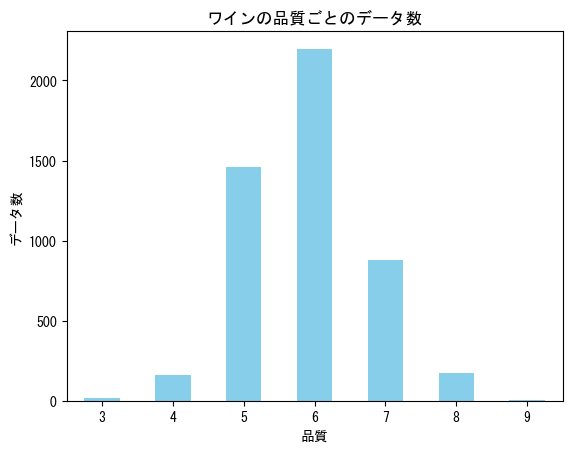

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'

# ワインの品質ごとのデータ数をグラフ化
quality_counts.plot(kind='bar', color='skyblue')
plt.title('ワインの品質ごとのデータ数')
plt.xlabel('品質')
plt.ylabel('データ数')
plt.xticks(rotation=0)  # X軸のラベルを回転しないように設定
plt.show()

#### Step１２　qualityを以下のように3段階に変換するための辞書を作成する
- 辞書は、「キー：値」のペアをカンマで区切り、{}で囲む
~~~
変換前　変換後
3       0
4       0
5       1
6       1
7       1
8       2
9       2
~~~

In [28]:
quality_mapping = {
    3: 0,
    4: 0,
    5: 1,
    6: 1,
    7: 1,
    8: 2,
    9: 2
}

#### Step１３　上記辞書を使って、qualityを0 , 1, 2 に変換せよ
- qualityに上記辞書を使った map 関数を適用する

In [29]:
# Quality列を0, 1, 2に変換
wine['quality'] = wine['quality'].map(quality_mapping)

# 変換後のデータを表示
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        1  
1      9.5        1  
2     10.1        1 

#### Step１４　正解データ（y）をセットしなおす

In [30]:
# Quality列を0, 1, 2に変換
# wine['quality'] = wine['quality'].map(quality_mapping)

# 正解データ (y) を再設定
y = wine['quality']

# yの先頭5行を表示して確認
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: quality, dtype: int64


In [31]:
# "quality" 列の欠損値を平均値で置き換える
average_quality = wine['quality'].mean()
wine['quality'].fillna(average_quality, inplace=True)

#### Step１５　X と y を訓練データとテストデータに分割せよ
- テストサイズ は0.3 を指定
- random_state は123 を指定

In [32]:
from sklearn.model_selection import train_test_split

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 分割結果の確認
print("訓練データの特徴量 (X_train) のサイズ:", X_train.shape)
print("テストデータの特徴量 (X_test) のサイズ:", X_test.shape)
print("訓練データの正解データ (y_train) のサイズ:", y_train.shape)
print("テストデータの正解データ (y_test) のサイズ:", y_test.shape)

訓練データの特徴量 (X_train) のサイズ: (3428, 11)
テストデータの特徴量 (X_test) のサイズ: (1470, 11)
訓練データの正解データ (y_train) のサイズ: (3428,)
テストデータの正解データ (y_test) のサイズ: (1470,)


#### Step１６　ランダムフォレストをインポートし、インスタンス化せよ
- ハイパーパラメータは
- max_depth=5
- n_estimators=200
- random_state=123

In [33]:
from sklearn.ensemble import RandomForestClassifier

# ランダムフォレストのインスタンス化
rf_classifier = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=123)

# モデルの確認
print(rf_classifier)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=123)


In [34]:
# 欠損値の確認
print(wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


#### Step１７　訓練データを与えて、モデルを学習させよ

In [35]:
# ランダムフォレストモデルを訓練データで学習させる
rf_classifier.fit(X_train, y_train)

# モデルの学習が完了したことを確認
print("ランダムフォレストモデルの学習が完了しました。")


ランダムフォレストモデルの学習が完了しました。


#### Step１８　訓練データに対する正解率を求めよ

In [36]:
from sklearn.metrics import accuracy_score

# 訓練データでの予測
y_train_pred = rf_classifier.predict(X_train)

# 訓練データの正解率を計算
train_accuracy = accuracy_score(y_train, y_train_pred)

# 正解率の表示
print(f"訓練データの正解率: {train_accuracy:.2f}")

訓練データの正解率: 0.93


#### Step１９　テストデータに対する正解率を求めよ

In [37]:
# テストデータでの予測
test_accuracy = rf_classifier.score(X_test, y_test)
print("テストデータの正解率:", test_accuracy)

テストデータの正解率: 0.9285714285714286


#### Step２０　Step１９求めた正解率とStep９の正解率と比べてみよう

In [38]:
# Step18: 訓練データでの正解率
train_accuracy = rf_classifier.score(X_train, y_train)
print("Step18: 訓練データの正解率:", train_accuracy)

# Step19: テストデータでの正解率
test_accuracy = rf_classifier.score(X_test, y_test)
print("Step19: テストデータの正解率:", test_accuracy)

# Step20: Step19とStep9の正解率を比較
print("Step20: テストデータの正解率と訓練データの正解率の差:", test_accuracy - train_accuracy)

Step18: 訓練データの正解率: 0.9305717619603268
Step19: テストデータの正解率: 0.9285714285714286
Step20: テストデータの正解率と訓練データの正解率の差: -0.0020003333888981567
